In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
dataset = pd.read_csv("kaggle_diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


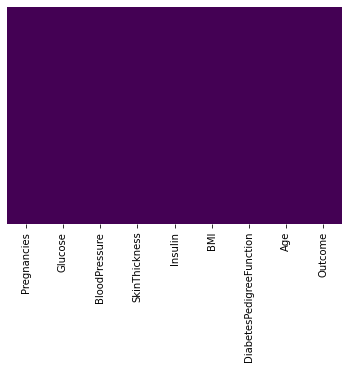

In [4]:
sns.heatmap(dataset.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [5]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


In [32]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [33]:
print(X)

[[2.00e+00 1.38e+02 6.20e+01 ... 3.36e+01 1.27e-01 4.70e+01]
 [0.00e+00 8.40e+01 8.20e+01 ... 3.82e+01 2.33e-01 2.30e+01]
 [0.00e+00 1.45e+02 0.00e+00 ... 4.42e+01 6.30e-01 3.10e+01]
 ...
 [6.00e+00 8.50e+01 7.80e+01 ... 3.12e+01 3.82e-01 4.20e+01]
 [0.00e+00 1.29e+02 1.10e+02 ... 6.71e+01 3.19e-01 2.60e+01]
 [2.00e+00 8.10e+01 7.20e+01 ... 3.01e+01 5.47e-01 2.50e+01]]


In [34]:
print(y)

[1 0 1 ... 0 1 0]


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
from sklearn.linear_model import LogisticRegression
lc = LogisticRegression()
lc.fit(X_train,y_train)
y_pred = lc.predict(X_test)

/home/cn44/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print(y_pred)

[0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0]


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[245  27]
 [ 60  68]]


0.7825

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
#cws=cross_val_score(clf, X_train, y_train, cv=10)
y_pred = clf.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[267   5]
 [  2 126]]


0.9825

In [52]:
import pickle
# Creating a pickle file for the classifier
filename = 'diabetes-prediction-dtc-model.pkl'
pickle.dump(clf, open(filename, 'wb'))